# UTSA CS 3793/5233: Assignment-1

**Roberts - Clay - (gbi069)**






## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies


## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**.
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(45 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [301]:
# Add only your imports here
from google.colab import drive
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from copy import deepcopy

In [302]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [303]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"
!ls "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"

cities.csv  distances.csv  texas-map.png


In [304]:
# Load the graph data from the files
distances_df = pd.read_csv(basePath + 'distances.csv', names=['City 1', 'City 2', 'Distance'], header=None)
cities_df = pd.read_csv(basePath + 'cities.csv', names=['City', 'Longitude', 'Latitude'], header=None)
map_texas = basePath + 'texas-map.png'
# cities_df = cities_df.set_index('City')
cities_df.head()


,City,Longitude,Latitude
0,Abilene,32.4543,-99.7384
1,Alice,27.7556,-98.0653
2,Amarillo,35.1989,-101.8310
3,Austin,30.3006,-97.7517
4,Beaumont,30.0850,-94.1451


In [305]:
# Used https://www.bogotobogo.com/python/python_graph_data_structures.php to help create these objects, added functionality as needed to suit the problem
class Vertex:
  """City with loaction and connections"""

  def __init__(self, city, latitude, longitude):
    self.id = city
    self.adjacent = {}
    self.x = latitude
    self.y = longitude
    self.visited = 0

    self.g = 0
    self.h = 0
    self.f = 0
    self.parent = None

  def __str__(self):
    return str(self.id) + ' coordinates: (' + str(self.x) + ', ' + str(self.y) +  '), adjacent: ' + str([x.id for x in self.adjacent])

  def add_neighbor(self, neighbor, weight=0):
    self.adjacent[neighbor] = weight

  def get_connections(self):
    return self.adjacent.keys()

  def get_id(self):
    return self.id

  def get_weight(self, neighbor):
    return self.adjacent[neighbor]

  def visit(self):
    self.visited = 1

  def unvisit(self):
    self.visited = 0

  def get_visit(self):
    return self.visited

  def parent_trace(self):
    if self.parent is None:
      return
    else:
      print(self.parent.id)
      return self.parent.parent_trace()

class Graph:
  def __init__(self):
    self.vert_dict = {}
    self.num_vertices = 0

  def __iter__(self):
    return iter(self.vert_dict.values())

  def add_vertex(self, city, latitude, longitude):
    self.num_vertices = self.num_vertices + 1
    new_vertex = Vertex(city, latitude, longitude)
    self.vert_dict[city] = new_vertex
    return new_vertex

  def get_vertex(self, n):
    if n in self.vert_dict:
        return self.vert_dict[n]
    else:
        return None

  def add_edge(self, frm, to, cost = 0):
    if frm not in self.vert_dict:
        self.add_vertex(frm)
    if to not in self.vert_dict:
        self.add_vertex(to)

    self.vert_dict[frm].add_neighbor(self.vert_dict[to], cost)
    self.vert_dict[to].add_neighbor(self.vert_dict[frm], cost)

  def get_vertices(self):
    return self.vert_dict.keys()

In [306]:
map = Graph()

[map.add_vertex(info['City'], info['Latitude'], info['Longitude']) for index, info in cities_df.iterrows()]

[map.add_edge(info['City 1'], info['City 2'], info['Distance']) for index, info in distances_df.iterrows()]

print(map.get_vertex("San Antonio").adjacent)

{<__main__.Vertex object at 0x7fa97b24e470>: 210.8494821, <__main__.Vertex object at 0x7fa97b24e620>: 30.80876734, <__main__.Vertex object at 0x7fa97b24c1c0>: 33.99204585, <__main__.Vertex object at 0x7fa97b24d900>: 74.50909807, <__main__.Vertex object at 0x7fa97b24e2c0>: 82.70993933}


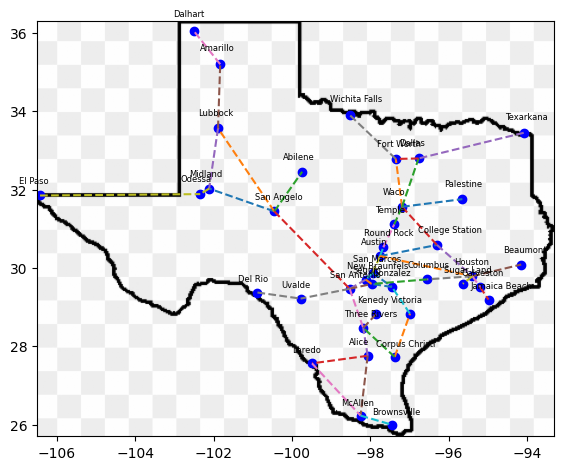

In [307]:
# Display a 2D graph of the given data.
im = plt.imread(map_texas)
fig, ax  = plt.subplots()

for index, info in cities_df.iterrows():
    x = info['Latitude']
    y = info['Longitude']
    label = info['City']
    plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.005), y * (1 + 0.01) , str(label), fontsize=6)

for index, info in distances_df.iterrows():
    x = info['City 1']
    y = info['City 2']
    label = info['Distance']
    lat = [map.get_vertex(x).x, map.get_vertex(y).x]
    lon = [map.get_vertex(x).y, map.get_vertex(y).y]
    plt.plot(lat, lon, linestyle = '--')
    # plt.text(x * (1 + 0.01), y * (1 + 0.01) , str(label), fontsize=6)

plt.rcParams["figure.autolayout"] = True
# Used https://www.texasalmanac.com/articles/environment for coordinates of Texas
# Tweeked slightly to try and get cities visually closer to where they are in reality
im = ax.imshow(im, extent=[-106.5, -93.31, 25.7, 36.3])
plt.show()

#Virus Spread - Uninformed Search Agent

##(40 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [308]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'
# used https://www.geeksforgeeks.org/python-program-for-breadth-first-search-or-bfs-for-a-graph/ to help make function
# but changed it significantly
def breadth_first (city):
  queue = []
  order = []
  queue.append(city)
  city.visit()
  distance = 0

  while queue:

    s = queue.pop(0)
    order.append(s)

    for item in s.adjacent:
        if item.visited == 0:
            queue.append(item)
            distance += s.adjacent[item]
            item.visit()

  # print("Distance Travelled: " + str(distance))
  [map.get_vertex(item.id).unvisit() for item in order]

  return order

In [309]:
order = breadth_first(map.get_vertex('Three Rivers'))
[item.id for item in order]

['Three Rivers',
 'San Antonio',
 'Corpus Christi',
 'Alice',
 'Kenedy',
 'San Angelo',
 'New Braunfels',
 'Seguin',
 'Uvalde',
 'Victoria',
 'Laredo',
 'McAllen',
 'Midland',
 'Lubbock',
 'Abilene',
 'San Marcos',
 'Gonzalez',
 'Columbus',
 'Del Rio',
 'Brownsville',
 'Odessa',
 'Amarillo',
 'Austin',
 'Houston',
 'El Paso',
 'Dalhart',
 'Round Rock',
 'College Station',
 'Beaumont',
 'Galveston',
 'Sugar Land',
 'Temple',
 'Waco',
 'Jamaica Beach',
 'Palestine',
 'Fort Worth',
 'Dallas',
 'Wichita Falls',
 'Texarkana']

In [310]:
def breadth_first_map (city, plt):
  queue = []
  order = []
  queue.append(city)
  city.visit()
  distance = 0

  while queue:

    s = queue.pop(0)
    order.append(s)
    plt.plot(s.x, s.y, 'bo')
    plt.text(s.x * (1 + 0.005), s.y * (1 + 0.01), str(s.id), fontsize=6)

    for item in s.adjacent:
        if item.visited == 0:
            queue.append(item)
            distance += s.adjacent[item]
            item.visit()
            lat = [s.x, item.x]
            lon = [s.y, item.y]
            plt.plot(lat, lon, linestyle = '--')

  [map.get_vertex(item.id).unvisit() for item in order]


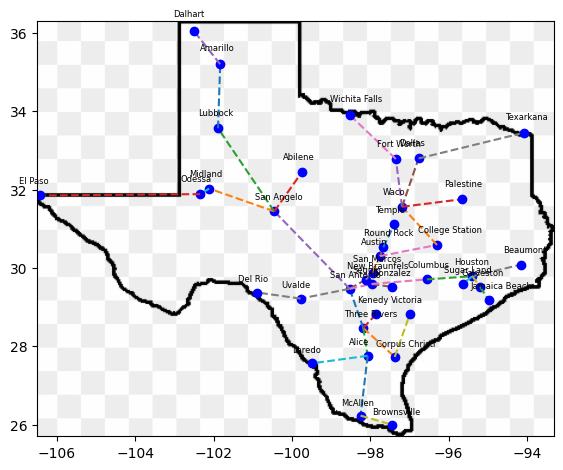

In [311]:
# Display a 2D graph of the given data.
im = plt.imread(map_texas)
fig, ax  = plt.subplots()
breadth_first_map (map.get_vertex('Three Rivers'), plt)
plt.rcParams["figure.autolayout"] = True
im = ax.imshow(im, extent=[-106.5, -93.31, 25.7, 36.3])
plt.show()

#Vaccine Transportation - Informed Search Agent

##(40 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [312]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'San Antonio' to 'College Station'

def trace(end, ord):
  if end.parent is None:
    dist = 0
    ord.append(end)
    # print(end.id)
    return ord, dist
  dist = trace(end.parent, ord)[1] + end.adjacent[end.parent]
  ord.append(end)
  # print(end.id)
  return ord, dist

def astar(start, end):
  openlist = []
  openlist.append(start)
  closedlist = []

  ## get original h for start
  start.h = ((((end.y - start.y)*69)**2) + (((end.x - start.x)*54.6)**2))**(1/2)
  start.g = 0
  start.f = start.g + start.h
  start.parent = None

  num = 0
  while (len(openlist) > 0 and num < 5):
    current = openlist[0]
    openlist.pop(0).id
    closedlist.append(current)
    for neighbor in current.adjacent:
      # print('===========' + str(neighbor))

      if neighbor == end:
        end.g = current.g + current.adjacent[end]
        end.f = end.g
        end.parent = current
        # print([item.id for item in closedlist])
        # print("DONE")
        return
      else:
        successor = deepcopy(neighbor)
        successor.h = ((((end.y - neighbor.y)*69)**2) + (((end.x - neighbor.x)*54.6)**2))**(1/2)
        successor.g = current.g + neighbor.adjacent[current]
        successor.f = successor.g + successor.h
        successor.parent = current

      count = 0
      if len(closedlist) > 0:
        for item in closedlist:
          if item.id == neighbor.id:
            count += 1

      if count > 0:
        continue
      else:
        if len(openlist) > 0:
          for item in openlist:
            if item.id == neighbor.id:
              if item.f > successor.f:
                neighbor.g, neighbor.h, neighbor.f, neighbor.parent = successor.g, successor.h, successor.f, successor.parent
                item = neighbor
              count += 1

          if count == 0:
            neighbor.g, neighbor.h, neighbor.f, neighbor.parent = successor.g, successor.h, successor.f, successor.parent
            openlist.append(neighbor)
        else:
          neighbor.g, neighbor.h, neighbor.f, neighbor.parent = successor.g, successor.h, successor.f, successor.parent
          openlist.append(neighbor)
  # print("No Solution")

def astar_reset(map):
  for item in map:
    item.g, item.h, item.f, item.parent = 0, 0, 0, None

In [313]:
astar(map.get_vertex('San Antonio'), map.get_vertex('College Station'))
end = map.get_vertex('College Station')
cities = []
cities, dist = trace(end, cities)
print([item.id for item in cities])
print(dist)

['San Antonio', 'New Braunfels', 'San Marcos', 'Austin', 'College Station']
186.77450141


In [314]:
def map_trace(cities):
    for item in cities:
      plt.plot(item.x, item.y, "bo")
      plt.text(item.x * (1 + 0.005), item.y * (1 + 0.01), str(item.id), fontsize=6)

    for i in range(len(cities)-1, 0, -1):
      if cities[i].parent == None:
        return
      lat = [cities[i].x, cities[i - 1].x]
      lon = [cities[i].y, cities[i - 1].y]
      plt.plot(lat, lon, linestyle = '--')

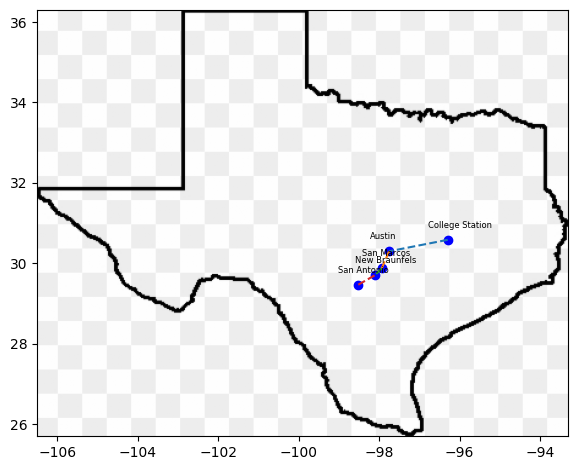

In [315]:
im = plt.imread(map_texas)
fig, ax  = plt.subplots()
map_trace(cities)
plt.rcParams["figure.autolayout"] = True
im = ax.imshow(im, extent=[-106.5, -93.31, 25.7, 36.3])
plt.show()

In [316]:
astar_reset(map)

#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (45 points) Reading Data files & Creating a 2D Graph
*   (40 points) Virus Spread - Uninformed Search Agent
*   (40 points) Vaccine Transportation - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



